In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from glob import glob

import librosa
import librosa.display
import pandas as pd
import random

from sklearn import svm
from sklearn.model_selection import train_test_split



# Import and analyze the data

In [3]:
# # Rename the audio files
# audio_path = (f'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/')

# folders = ['gravel', 'concrete', 'leaves', 'snow', 'sand', 'grass']
# audio_paths = {}

# for folder in folders:
#     files = os.path.join(audio_path, folder)
#     i = 0
#     for file in os.listdir(files):
#         os.rename(files + '/' + file, files + '/' + folder + str(i) + '.wav' )
#         i = i + 1




In [4]:
random.seed(12345)
audio_path = (f'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/')

folders = ['gravel', 'concrete', 'leaves', 'snow', 'sand', 'grass']
audio_paths = {}

for folder in folders:
    audio_paths[folder] = os.path.join(audio_path, folder)


# Choose 5 files from each directory
audio_test_files = {}

for key in audio_paths:
    audio_test_files[key] = random.sample(glob(audio_paths[key] + '/*.wav'), 5)

print(audio_test_files)



{'gravel': ['E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/gravel\\gravel32.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/gravel\\gravel9.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/gravel\\gravel0.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/gravel\\gravel26.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/gravel\\gravel3.wav'], 'concrete': ['E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/concrete\\concrete2.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/concrete\\concrete24.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/concrete\\concrete41.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/concrete\\concrete33.wav', 'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/concrete\\concrete18.wav'], 'leaves': ['E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machi

## Visualize the audio timeseries data

In [5]:
def isolate_impact(audioData):
    startIndex = 0
    endIndex = audioData.shape[0]

    for i in range(endIndex):
        if np.abs(audioData[i]) > 0.025: 
            startIndex = i - 200
            if startIndex < 0:
                 startIndex = 0
            endIndex = startIndex + 1024
            break

    # print(startIndex, endIndex)
    return audioData[startIndex:endIndex]


C:\Users\aleks\AppData\Local\Temp\ipykernel_12708\4134822161.py:5: FutureWarning: Pass y=[-0.00079346 -0.00079346 -0.00076294 ...  0.00567627  0.00564575
  0.00570679] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectogram = librosa.feature.melspectrogram(audio, )


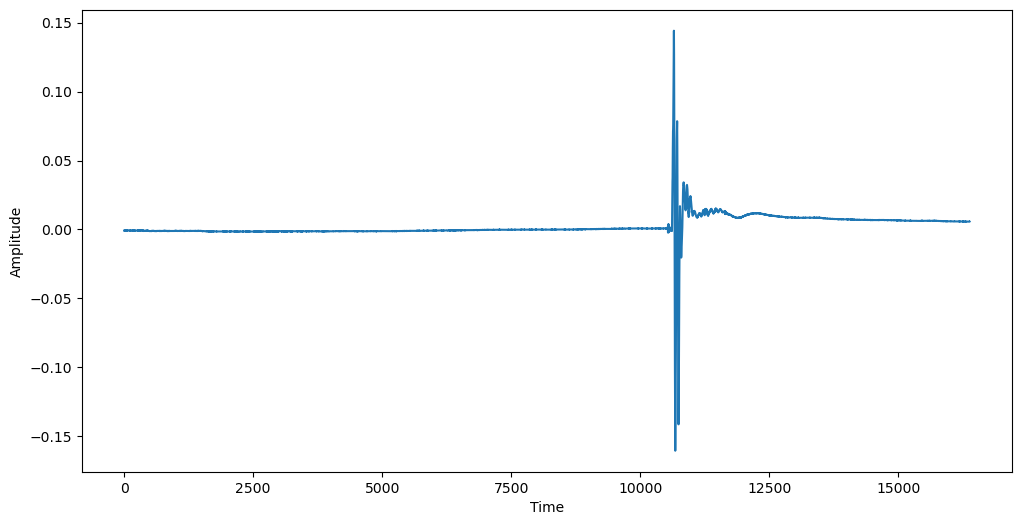

In [6]:
fig = plt.figure(figsize =(12,6))

file = audio_test_files['concrete'][4]
audio, _ = librosa.load(file, sr=16000)
spectogram = librosa.feature.melspectrogram(audio, )

plt.plot(pd.Series(audio))

plt.xlabel("Time")
plt.ylabel("Amplitude")
# plt.savefig(f'figure/rawAudioExample.svg')
plt.show()

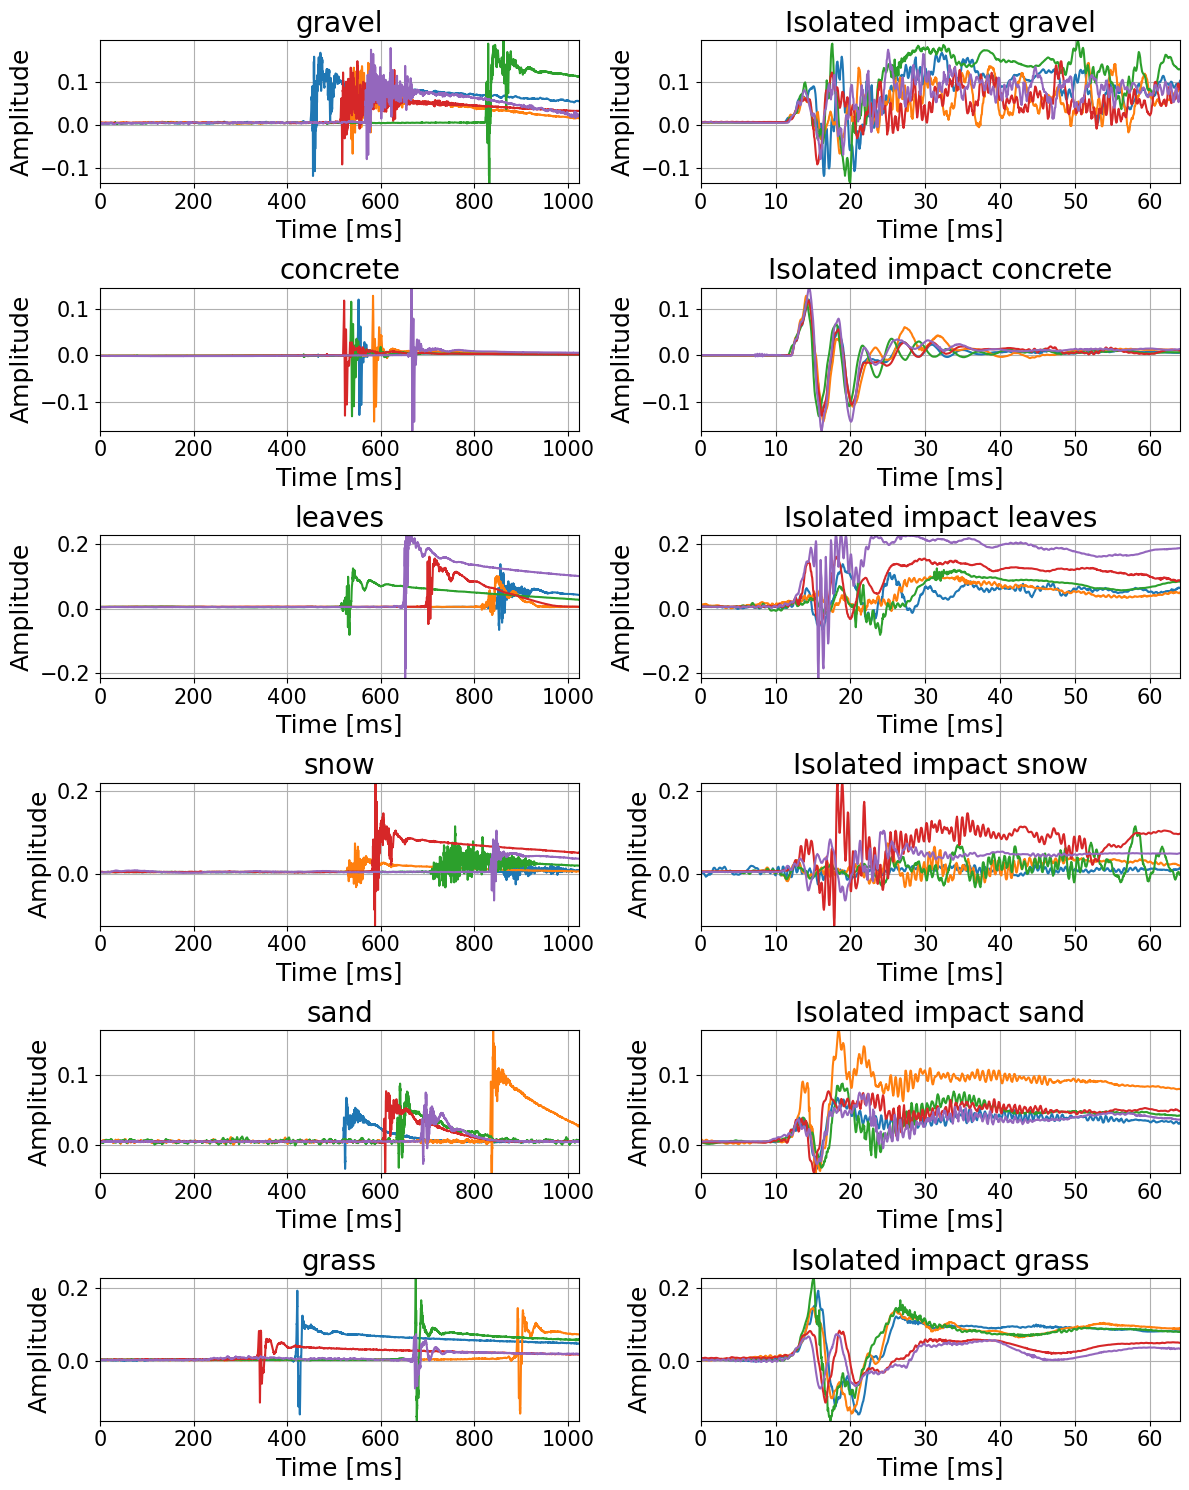

In [7]:
# Create a figure with 6 subplots arranged vertically
fig, axs = plt.subplots(6, 2, figsize=(12, 15))

# Plot each subplot
index = 0
for key in audio_test_files:
    for file in audio_test_files[key]:
        audio, sample_rate = librosa.load(file, sr=16000)
        iso_audio = isolate_impact(audio)
        duration = len(audio) / sample_rate
        time = np.linspace(0, duration * 1000, len(audio))  # Convert time to milliseconds
        iso_duration = len(iso_audio) / sample_rate
        iso_time = np.linspace(0, iso_duration * 1000, len(iso_audio))  # Convert time to milliseconds


        axs[index][0].plot(time, pd.Series(audio))
        axs[index][1].plot(iso_time, pd.Series(isolate_impact(iso_audio)))
        axs[index][0].grid(True)
        axs[index][1].grid(True)
        axs[index][0].set_title(key, fontsize=20)
        axs[index][1].set_title(f'Isolated impact {key}', fontsize=20)
        axs[index][0].tick_params(labelsize=15)
        axs[index][1].tick_params(labelsize=15)
        axs[index][0].autoscale(tight=True)
        axs[index][1].autoscale(tight=True)
        # axs[index][1].set_xticklabels(iso_time, fontsize=10)
        # axs[index][0].set_yticklabels(pd.Series(audio), fontsize=10)
        # axs[index][1].set_yticklabels(pd.Series(isolate_impact(iso_audio)), fontsize=10)
        axs[index][0].set_xlabel('Time [ms]', fontsize=18)
        axs[index][1].set_xlabel('Time [ms]', fontsize=18)
        axs[index][0].set_ylabel('Amplitude', fontsize=18)
        axs[index][1].set_ylabel('Amplitude', fontsize=18)
    index = index + 1

# Adjust the spacing between subplots
plt.tight_layout()


plt.savefig(f'figures/audio/audioSamples.svg')
# Show the plot
plt.show()


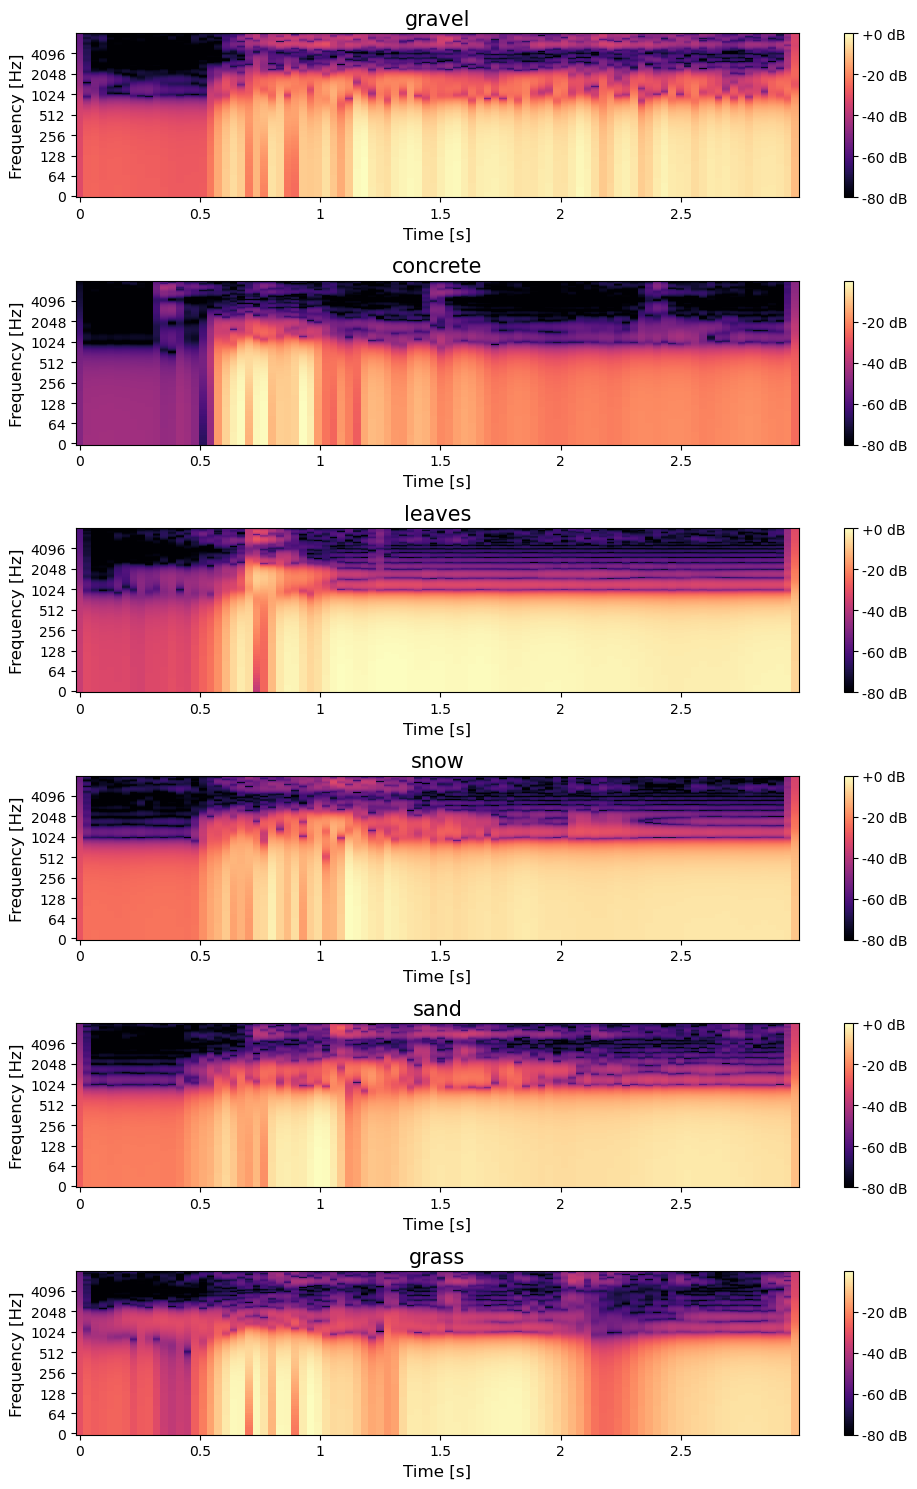

C:\Users\aleks\AppData\Local\Temp\ipykernel_13292\4155709062.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_freq.show()


In [ ]:
# Create a separate figure for the frequency response
fig_freq, axs_freq = plt.subplots(6, 1, figsize=(10, 15))

# Plot each subplot
index = 0
for key in audio_test_files:
    for file in audio_test_files[key]:
        audio, sample_rate = librosa.load(file, sr=16000)
        isolated_audio = isolate_impact(audio)
                # Plot frequency response
        D = librosa.stft(isolated_audio, win_length = 32, hop_length = 11)
        img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                                 sr=sample_rate, x_axis='time', y_axis='log', ax=axs_freq[index])
        axs_freq[index].set_title(f'{key}', fontsize = 15)
        axs_freq[index].set_xlabel('Time [s]', fontsize = 12)
        axs_freq[index].set_ylabel('Frequency [Hz]', fontsize = 12)
    fig_freq.colorbar(img, ax=axs_freq[index], format="%+2.f dB")

    index += 1

# Adjust the spacing between subplots
plt.tight_layout()
# plt.savefig(f'figures/audio/audioFrequencyResponse.svg')
# Show the plots
plt.show()
fig_freq.show()

In [ ]:
def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=isolate_impact(y), sr=16000, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)


def create_template(folder_path):
    files = os.listdir(folder_path)
    mfccs = []

    for file in files:
        file_path = os.path.join(folder_path, file)
        mfcc = extract_mfcc(file_path)
        mfccs.append(mfcc)

    return np.mean(mfccs, axis=0)

## Feature extraction and visualization using MFCC

In [ ]:
audio_path = (f'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/')
classes = ['gravel', 'concrete', 'leaves', 'snow', 'sand', 'grass']
# Initialize the feature matrix and target vector
feature_size = 6

X = np.empty((0, feature_size))
y = np.empty((0,))

# Loop through the classes and read the files
for i, class_name in enumerate(classes):
    class_path = os.path.join(audio_path, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        # Extract the features from the file using librosa or other libraries
        
        features = extract_mfcc(file_path, feature_size)
        # Append the features and target to the feature matrix and target vector
        X = np.vstack((X, features))
        y = np.hstack((y, i))

c:\Users\aleks\miniconda3\envs\SmartPaw\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1024
  return f(*args, **kwargs)


In [ ]:
y_str = []
for i in range(len(y)):
    y_str.append(classes[int(y[i])])   

df = pd.DataFrame(X)
df['class'] = y_str
print(df)


              0           1          2          3          4          5  \
0   -249.053467  133.191315  22.006464  17.853519  -4.549282  35.942783   
1   -377.327789  152.335434  35.041225   2.517082 -12.202010  32.021034   
2   -261.794495  149.368149  28.032160   2.640364 -12.821269  39.513130   
3   -281.405060  158.629517  23.127787  -0.058712 -10.165318  40.978718   
4   -290.506256  171.048019  30.739653   0.887992 -14.421319  51.953785   
..          ...         ...        ...        ...        ...        ...   
278 -388.180756  121.823112  34.534782  25.786743   8.840802  65.854767   
279 -290.942902  133.245926  18.061731  30.894945  25.385544  60.115528   
280 -339.424347  117.367043  28.349945  25.640976  -2.033942  66.430351   
281 -436.900604  160.822556  40.590778  30.748785   7.499391  60.127605   
282 -360.057495  127.492119  23.546547  27.941587   4.581859  36.526020   

      class  
0    gravel  
1    gravel  
2    gravel  
3    gravel  
4    gravel  
..      ...  
2

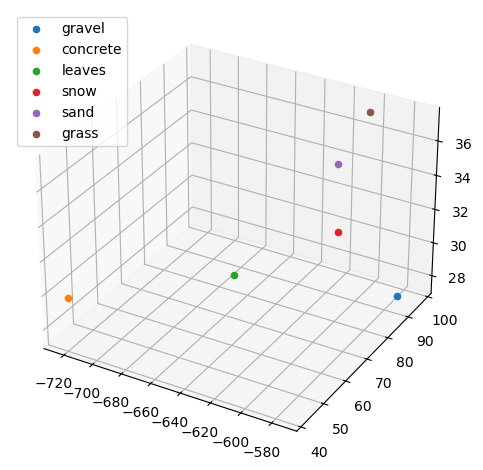

In [ ]:
# Choose 5 files from each directory
audio_files = {}

for key in audio_paths:
    audio_files[key] = glob(audio_paths[key] + '/*.wav')




# Create a 3D scatter plot
fig3d = plt.figure()
ax3d = fig3d.add_subplot(111, projection='3d')

# Plot each subplot
for key in audio_files:
    mfccs = []
    mfccs_iso = []
    for file in audio_files[key]:
        audio, sample_rate = librosa.load(file, sr=16000)
        # Mel-frequency cepstral coefficients (MFCCs) 
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        mfcc = np.mean(mfcc, axis=1)
        mfccs.append(mfcc)
        # MFCC of isolated impact
        mfcc_iso = librosa.feature.mfcc(y=isolate_impact(audio), sr=sample_rate, n_mfcc=13)
        mfcc_iso = np.mean(mfcc_iso, axis=1)
        mfccs_iso.append(mfcc_iso)

    # Plotting
    ax3d.scatter(np.mean(mfccs, axis=0)[0], np.mean(mfccs, axis=0)[1], np.mean(mfccs, axis=0)[2])



ax3d.legend(('gravel', 'concrete', 'leaves', 'snow', 'sand', 'grass'))





# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig('figures/audio/mfcc3dPlot.svg')

# Show the plot
plt.show()

C:\Users\aleks\AppData\Local\Temp\ipykernel_13292\3771370943.py:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = class_data.mean()
C:\Users\aleks\AppData\Local\Temp\ipykernel_13292\3771370943.py:46: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = class_data.mean()


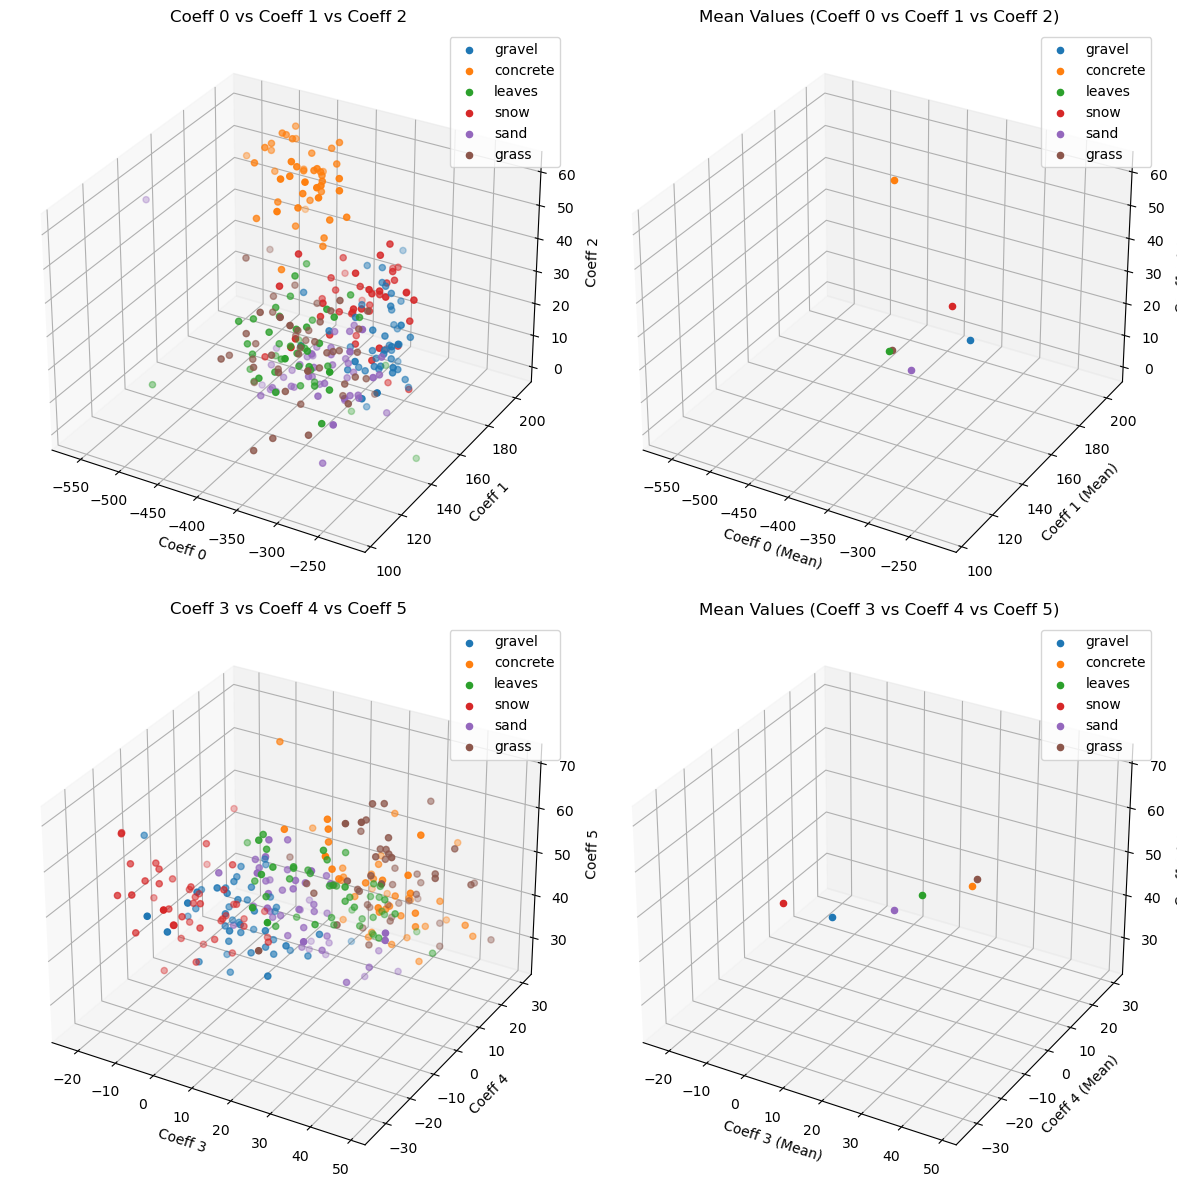

In [ ]:
# Define the classes
classes = ['gravel', 'concrete', 'leaves', 'snow', 'sand', 'grass']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': '3d'})

# Plot 1: Original Data (Column 0, 1, 2)
axs[0, 0].set_title('Coeff 0 vs Coeff 1 vs Coeff 2')
for i, cls in enumerate(classes):
    class_data = df[df['class'] == cls]
    axs[0, 0].scatter(class_data[0], class_data[1], class_data[2], c=colors[i], label=cls)
axs[0, 0].set_xlabel('Coeff 0')
axs[0, 0].set_ylabel('Coeff 1')
axs[0, 0].set_zlabel('Coeff 2')
axs[0, 0].legend()

# Plot 2: Mean Values (Column 0, 1, 2)
axs[0, 1].set_title('Mean Values (Coeff 0 vs Coeff 1 vs Coeff 2)')
for i, cls in enumerate(classes):
    class_data = df[df['class'] == cls]
    mean_values = class_data.mean()
    axs[0, 1].scatter(mean_values[0], mean_values[1], mean_values[2], c=colors[i], label=cls)
axs[0, 1].set_xlabel('Coeff 0 (Mean)')
axs[0, 1].set_ylabel('Coeff 1 (Mean)')
axs[0, 1].set_zlabel('Coeff 2 (Mean)')
axs[0, 1].set_xlim(axs[0, 0].get_xlim())
axs[0, 1].set_ylim(axs[0, 0].get_ylim())
axs[0, 1].set_zlim(axs[0, 0].get_zlim())
axs[0, 1].legend()

# Plot 3: Original Data (Column 3, 4, 5)
axs[1, 0].set_title('Coeff 3 vs Coeff 4 vs Coeff 5')
for i, cls in enumerate(classes):
    class_data = df[df['class'] == cls]
    axs[1, 0].scatter(class_data[3], class_data[4], class_data[5], c=colors[i], label=cls)
axs[1, 0].set_xlabel('Coeff 3')
axs[1, 0].set_ylabel('Coeff 4')
axs[1, 0].set_zlabel('Coeff 5')
axs[1, 0].legend()

# Plot 4: Mean Values (Column 3, 4, 5)
axs[1, 1].set_title('Mean Values (Coeff 3 vs Coeff 4 vs Coeff 5)')
for i, cls in enumerate(classes):
    class_data = df[df['class'] == cls]
    mean_values = class_data.mean()
    axs[1, 1].scatter(mean_values[3], mean_values[4], mean_values[5], c=colors[i], label=cls)
axs[1, 1].set_xlabel('Coeff 3 (Mean)')
axs[1, 1].set_ylabel('Coeff 4 (Mean)')
axs[1, 1].set_zlabel('Coeff 5 (Mean)')
axs[1, 1].set_xlim(axs[1, 0].get_xlim())
axs[1, 1].set_ylim(axs[1, 0].get_ylim())
axs[1, 1].set_zlim(axs[1, 0].get_zlim())
axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig('figures/audio/mfcc_comps_3dPlot.svg')

# Show the plot
plt.show()